In [1]:
#Principal component Analysis  -----Dimensionality reduction technique


The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

#Steps for PCA algorithm
1.Getting the dataset 
Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.

2.Representing data into a structure
Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.

3.Standardizing the data 
In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance. If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.

Mean = 0
Variance = 1

4. Calculating the Covariance of Z 
To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.

5.Calculating the Eigen Values and Eigen Vectors
Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.

6.Sorting the Eigen Vectors
In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P*.

7.Calculating the new features Or Principal Components
Here we will calculate the new features. To do this, we will multiply the P* matrix to the Z. In the resultant matrix Z, each observation is the linear combination of original features. Each column of the Z matrix is independent of each other.

8. Remove less or unimportant features from the new dataset.
The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

In [48]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [49]:
dataset = load_digits()

In [50]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
import numpy as np
import pandas as pd
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
print("Target is :" , dataset.target[1])

Target is : 1


Target is : 1


<Figure size 640x480 with 0 Axes>

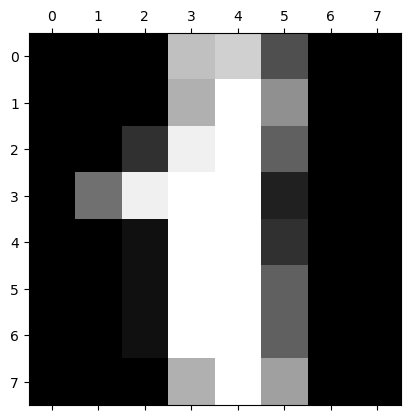

In [8]:
print("Target is :" , dataset.target[1])
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))
plt.show()

In [9]:
print("Target is :" , dataset.target[5])  # printing only first row means first picture
dataset.data[5]

Target is : 5


array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [10]:
df["Target"] = dataset.target

In [11]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


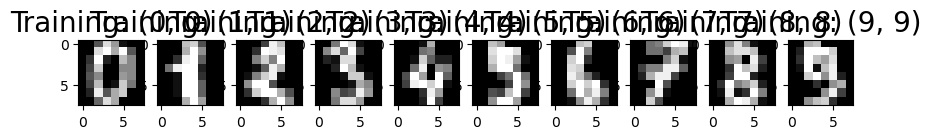

In [12]:
# Displaying some of the images and labels
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(dataset.data[0:10], dataset.target[0:10])):
    plt.subplot(1,10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label,index}", fontsize=20)

In [13]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [14]:
x = df
y = dataset.target

In [15]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [16]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
x.shape

(1797, 65)

In [18]:
y.shape

(1797,)

Standardization on our dataset so mean will be 0 and variance will be 1

Standardization is useful when you want make a symmetric data so model can work properly.

if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (for example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [20]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,-1.567746
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,-1.218646
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,-0.869545
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,-0.520445
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,-0.171345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008,1.574157
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008,-1.567746
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008,1.225056
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008,1.574157


In [21]:
x1 = X_scaled.T            # here we have taken the tranformation of x_scaled----rows to columns and columns to rows
pd.DataFrame(x1)

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,...,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016,-0.335016
2,-0.043081,-1.094937,-1.094937,0.377661,-1.094937,1.429517,-1.094937,0.377661,0.798404,1.219146,...,1.008775,-1.094937,0.588032,-0.043081,-1.094937,-0.253452,0.167290,-0.884566,-0.674195,1.008775
3,0.274072,0.038648,-1.844742,0.744919,-2.551014,-0.432200,0.038648,-0.903047,0.509495,0.038648,...,0.980343,-2.551014,0.980343,0.038648,-2.080166,-0.432200,0.980343,-0.196776,-0.432200,0.509495
4,-0.664478,0.268751,0.735366,0.268751,-0.197863,-2.764242,0.268751,0.268751,-0.897785,-2.764242,...,0.735366,0.035444,-2.064321,-0.897785,0.735366,0.268751,0.268751,0.735366,-1.131092,-0.897785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.366771,0.849632,-0.164037,0.241430,0.849632,0.849632,0.646898,-2.394110,0.646898,0.241430,...,-0.366771,0.444164,-0.366771,0.038697,0.849632,0.646898,0.444164,0.241430,0.849632,0.444164
61,-1.146647,0.548561,1.565686,0.379040,-0.468564,0.548561,0.718081,-1.146647,0.718081,-0.638085,...,-0.468564,0.379040,-0.977127,-0.638085,-0.468564,0.379040,-0.129523,-0.129523,0.887602,0.887602
62,-0.505670,-0.505670,1.695137,-0.505670,-0.505670,-0.505670,0.227932,-0.505670,-0.261136,-0.505670,...,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.505670,-0.261136
63,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,...,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008,-0.196008


In [ ]:
cov_mat = np.cov(X_scaled.T)
pd.DataFrame(cov_mat)

In [23]:
#Find eigen values and eigen vectors

In [24]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [25]:
pd.DataFrame(eig_vals)

,0
0,7.344787
1,5.899764
2,5.163824
3,3.973668
4,2.987264
...,...
60,0.123930
61,0.130583
62,0.000000
63,0.000000


In [26]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.182237,-0.042855,-0.027187,-0.180053,-0.039724,-0.198227,-0.070058,0.172512,0.225275,-0.059772,...,0.562304,0.135850,0.170141,-0.216619,-0.133790,-0.044909,-0.084265,0.0,0.0,0.0
2,0.285850,-0.058624,0.052941,-0.158471,-0.022230,-0.110539,0.008109,0.038947,0.121999,-0.007678,...,0.037639,-0.068372,0.009140,-0.075611,0.007390,-0.020067,-0.041767,0.0,0.0,0.0
3,0.220377,0.019781,0.040743,-0.166430,0.052872,0.096353,0.215186,-0.098451,-0.100870,0.021703,...,0.052701,0.078304,0.249187,0.226824,-0.102955,-0.191020,0.299809,0.0,0.0,0.0
4,-0.025253,-0.156829,0.060881,-0.003162,-0.134397,0.101930,-0.042911,0.014178,-0.091141,-0.005045,...,0.003964,-0.041775,-0.022484,-0.105186,0.038112,0.238791,-0.145965,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.017902,0.249446,0.071507,0.154802,-0.016465,-0.123606,-0.164511,0.022629,-0.156891,0.100386,...,-0.035301,-0.079032,0.003432,0.106560,-0.086219,-0.176124,-0.039540,0.0,0.0,0.0
61,0.103292,0.237106,0.033417,0.256280,0.092863,-0.054465,-0.021724,0.051948,-0.027772,0.036653,...,0.009359,0.043291,0.120601,-0.108651,0.086557,0.032017,0.032291,0.0,0.0,0.0
62,0.119899,0.166247,-0.093141,0.163778,0.230682,-0.082454,0.055675,-0.149913,0.129425,-0.057387,...,-0.010558,0.202328,0.016752,0.097524,0.103448,-0.055034,0.002446,0.0,0.0,0.0
63,0.071568,0.076852,-0.090868,0.116709,0.202854,-0.119442,-0.020626,-0.304548,0.193532,-0.029520,...,0.003043,-0.107540,-0.054845,-0.036883,-0.085069,0.002052,0.031723,0.0,0.0,0.0


In [27]:
#Explained variance ------- it represents the information explained by different PCA's
# is calculated as the ratio of eigenvalue with total eigenvalues


In [28]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]

In [47]:
tot

62.03452115812936

In [29]:
var_exp

[11.839837653617877,
 9.510453831516232,
 8.324113357744078,
 6.405576010100877,
 4.815485963264106,
 4.238914396587588,
 3.8840521560775656,
 3.7345684726791264,
 2.952017055049672,
 2.884712394901662,
 2.7704127880432634,
 2.5872515136652603,
 2.238715116272269,
 2.2282714480796595,
 2.1672535234911106,
 1.893698794253604,
 1.7507480775115578,
 1.7356070643735861,
 1.5933962753253075,
 1.4656521833440015,
 1.329358952340771,
 1.2823827528596807,
 1.1623017804875277,
 1.0516118037991224,
 1.0034524750729645,
 0.938368752639557,
 0.8959589510973847,
 0.8361129329392354,
 0.8004309072520579,
 0.7415017502003977,
 0.7141326686200276,
 0.6818199929147737,
 0.6433639778800359,
 0.631699400393246,
 0.5925258214862916,
 0.5633911941939866,
 0.52098186519954,
 0.505772291485111,
 0.47149972672855706,
 0.43890940705690024,
 0.4159919205433388,
 0.39069402135372183,
 0.36332343775828757,
 0.35057763735512804,
 0.3339001663480121,
 0.30927181544241455,
 0.2957916990950498,
 0.2802858344904596,
 

In [30]:
#Cumulative frequence --

cum_var_exp = np.cumsum(var_exp) 
pd.DataFrame(cum_var_exp)

,0
0,11.839838
1,21.350291
2,29.674405
3,36.079981
4,40.895467
...,...
60,99.918881
61,100.000000
62,100.000000
63,100.000000


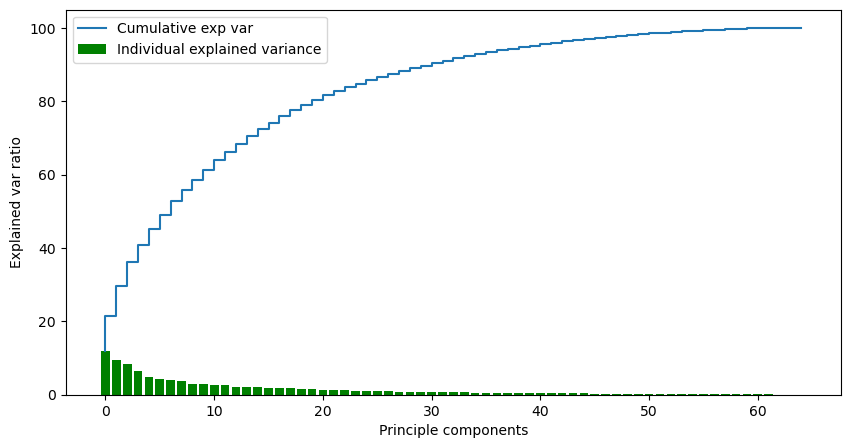

In [31]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, label = "Individual explained variance", color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, label = "Cumulative exp var")
plt.ylabel("Explained var ratio")
plt.xlabel("Principle components")
plt.legend()
plt.show()

In [32]:
# pca will be 40

In [33]:
from sklearn.decomposition import PCA
 
pca = PCA(0.95)
X_pca = pca.fit_transform(x)
X_pca.shape


(1797, 29)

In [34]:
pca.explained_variance_ratio_

array([0.14793203, 0.13533877, 0.11736819, 0.08354533, 0.05760242,
       0.04997671, 0.043828  , 0.03644352, 0.03341269, 0.03073511,
       0.02374693, 0.02263179, 0.01818323, 0.01765767, 0.01457881,
       0.01404747, 0.0132791 , 0.01250013, 0.01017906, 0.00899757,
       0.00886366, 0.00811611, 0.00771277, 0.00724598, 0.00702086,
       0.00592083, 0.00572518, 0.00522757, 0.00486257])

In [35]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.115617,21.340689,-9.366337,12.903006,-7.882994,-8.213376,2.400515,2.446919,-0.535343,-3.429216,...,-3.528766,2.189979,0.749181,2.593165,0.752231,1.740233,2.346870,-3.696564,-0.668317,-1.177546
1,7.954812,-20.661232,4.777225,-14.963435,5.311104,-7.516289,1.405646,-4.703933,3.351154,0.551022,...,-4.965119,-2.213616,6.054959,-0.138715,-3.642189,3.295798,0.066955,-1.907229,-1.183745,2.320868
2,7.016666,-9.873053,3.194924,-12.361530,-18.394570,-3.658545,0.332189,-16.495245,0.129267,-4.504869,...,8.512222,5.127209,4.033712,4.082156,2.560806,-3.649726,0.212788,-4.272726,1.647600,0.904895
3,-15.837464,3.508200,9.925248,-12.276708,6.881995,0.241128,0.114860,11.309578,-3.360427,-6.293916,...,-3.841502,-0.067183,-1.790561,3.973788,-0.903941,-1.790677,-1.320117,5.444145,5.495962,-1.053501
4,23.325276,4.161895,-5.705105,-13.872725,-0.568130,-3.100607,-0.529602,13.247984,-3.865148,-12.710492,...,4.780362,1.283749,-7.749933,-4.519581,0.304650,5.595002,-0.109352,-0.712326,1.226892,-3.298136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-14.668819,13.189709,-13.714008,-6.437745,4.133238,-1.068907,-5.848109,-4.297796,7.678699,8.176939,...,1.473271,1.948289,-1.897211,0.996337,1.712562,1.522650,-2.401566,-4.908992,-0.551965,-2.769625
1793,6.612985,20.615091,-9.047800,12.427272,-10.038915,-14.136308,1.558240,-3.970828,-6.801148,5.697044,...,-0.059648,-4.064230,1.010639,-1.119359,0.515149,2.537646,-1.154129,0.105707,-0.317073,-3.488843
1794,10.732405,-7.048626,5.468993,-7.173353,-3.478439,-9.820969,-8.024418,-7.912455,-3.062058,13.771860,...,2.263904,0.006527,-5.376702,0.777058,4.711539,-3.257662,4.475192,3.306304,2.236130,3.574053
1795,-4.930524,12.249613,-10.473960,-6.591258,4.017761,1.390380,-3.968299,-4.713968,4.470777,12.960086,...,0.051789,1.131586,4.060520,3.277504,-4.110231,2.702831,-2.751940,-2.924500,-0.465503,-0.846578


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 30)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9916666666666667

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
X_pca.shape

(1797, 2)

In [39]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)   #max_iter can change value
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

In [40]:
#Let us now try with Decision tree
from sklearn.model_selection import train_test_split
x_train_D,x_test_D,y_train_D,y_test_D =train_test_split(X_scaled, y, test_size=0.2, random_state=15)

In [41]:
#Applying PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=40) # inplace of 40, can also take 0.95
pca_x_train_D = pca.fit_transform(x_train_D)
pca_x_test_D = pca.transform(x_test_D)

In [42]:
from sklearn.tree import DecisionTreeClassifier
rf=DecisionTreeClassifier().fit(pca_x_train_D,y_train_D)
predicted=rf.predict(pca_x_test_D)   
predicted  #This is predicted values

array([7, 4, 4, 1, 2, 6, 4, 2, 5, 2, 5, 6, 3, 6, 6, 6, 4, 6, 6, 3, 9, 8,
       2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 0, 7, 1, 8, 7, 9, 8, 0, 4, 9,
       3, 8, 7, 8, 7, 3, 8, 9, 2, 1, 2, 8, 6, 7, 8, 4, 2, 9, 5, 0, 9, 5,
       3, 3, 4, 4, 6, 4, 9, 0, 4, 3, 2, 4, 4, 5, 2, 7, 1, 5, 1, 1, 9, 1,
       2, 9, 5, 5, 5, 0, 8, 2, 7, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
       7, 3, 4, 7, 1, 3, 4, 6, 4, 8, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 4, 8,
       2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 9, 6, 6, 6, 9, 0, 9, 5, 1, 8,
       7, 2, 8, 4, 1, 6, 8, 3, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 4, 4, 8, 4,
       1, 3, 0, 7, 9, 7, 4, 1, 3, 0, 2, 4, 5, 3, 3, 6, 8, 4, 5, 6, 8, 5,
       2, 5, 7, 6, 5, 9, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 3, 3, 4, 3,
       3, 4, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 1, 1,
       0, 6, 5, 9, 4, 8, 5, 0, 9, 9, 1, 7, 5, 9, 9, 9, 5, 0, 7, 9, 7, 6,
       2, 5, 5, 9, 7, 8, 7, 6, 2, 2, 8, 8, 7, 1, 1, 1, 3, 0, 2, 3, 3, 7,
       6, 2, 6, 9, 5, 3, 7, 3, 9, 8, 5, 0, 5, 9, 7,

In [43]:
y_test_D #this is actual values

array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
       2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
       3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
       8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
       2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
       8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
       2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
       7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
       1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
       2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
       8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
       0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
       2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
       6, 2, 6, 9, 5, 3, 7, 9, 3, 8, 5, 0, 5, 3, 3,

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(predicted,y_test_D)

0.8222222222222222